Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')
Accuracy: 1.0


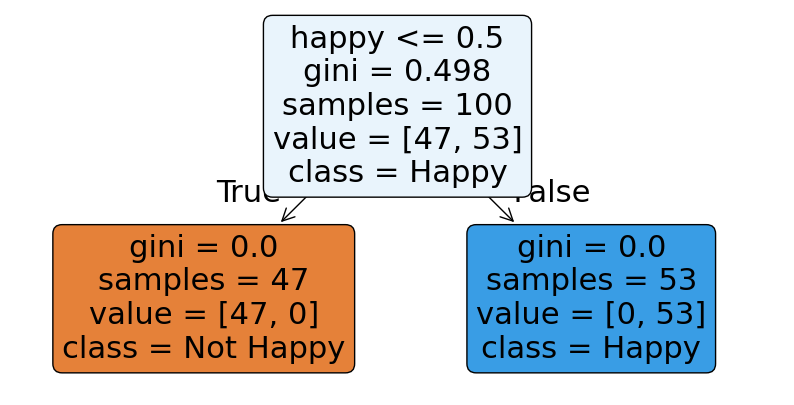

InvocationException: GraphViz's executables not found

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

data = pd.read_csv('happydata.csv')
data.head()
print(data.columns)
data = data.rename(columns={'ëvents': 'events'})

col_names=['infoavail','housecost','schoolquality','policetrust','streetquality','events','happy']
feature_cols =['infoavail','housecost','schoolquality','policetrust','streetquality','events','happy']

X = data[feature_cols]
y = data['happy']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(10,5))
plot_tree(clf, feature_names=feature_cols, class_names=['Not Happy', 'Happy'], filled=True, rounded=True)
plt.show()

dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=feature_cols,
                           class_names=['Not Happy', 'Happy'], 
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")

# Display image
Image("decision_tree.png")

    


